In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfTransformer, HashingVectorizer, CountVectorizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score,mean_absolute_error,mean_squared_error,median_absolute_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor
# import xgboost as xgb
from sklearn.svm import SVR, SVC
from sklearn.linear_model import Lasso,LassoCV,LassoLarsCV, LinearRegression, Ridge, ElasticNet
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

font2 = {"size":20, "weight":"normal"}

data = pd.read_csv("toxiccomments_train.csv")
data = data.dropna()

ID = data["id"]
identity_hate = data["identity_hate"]
comment_text = data['comment_text']
has = HashingVectorizer().fit(comment_text)
features = has.fit_transform(comment_text)



D_tree regression model mean absolute error： 0.013787117431068446
D_tree regression model mean squared error ： 0.007889561597191622
D_tree regression model median absolute error： 0.004125190565868532
D_tree regression model explained variance score： 0.13094246436246726
D_tree regression model r2 score： 0.13092043845729573




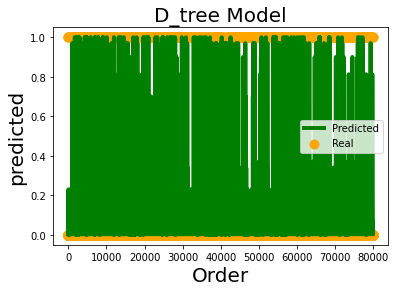

In [5]:


X_train, X_test, y_train, y_test = train_test_split(features, identity_hate, test_size=0.5, random_state=0)
D_tree=DecisionTreeRegressor(max_depth=7)
D_tree.fit(X_train,y_train)
y_predict = D_tree.predict(X_test) #Predict the result by utilizing the SVC model

print('D_tree regression model mean absolute error：',mean_absolute_error(y_test,y_predict))  #越小越好
print('D_tree regression model mean squared error ：',mean_squared_error(y_test,y_predict))   #越小越好
print('D_tree regression model median absolute error：',median_absolute_error(y_test,y_predict))  #越小越好
print('D_tree regression model explained variance score：',explained_variance_score(y_test,y_predict))    #越大越好
print('D_tree regression model r2 score：',r2_score(y_test,y_predict))     #越大越好                               #越大越好
print("\n")

plt.figure()        #Create a new figure
plt.scatter( range(len(y_test)), y_test, color = "orange", label = "Real", linewidth = 4)   #Plot the real data
plt.plot(range(len(y_test)), y_predict, color = "green", label = "Predicted", linewidth = 4) #Plot the predicted data
plt.title("D_tree Model", fontdict=font2)    #Set the model title name
plt.xlabel("Order", fontdict= font2)
plt.ylabel("predicted", fontdict= font2)
plt.legend()
plt.show()

ridger regression model mean absolute error： 0.023010864627871105
ridger regression model mean squared error ： 0.006756091229664628
ridger regression model median absolute error： 0.009049079836066478
ridger regression model explained variance score： 0.2558479550681073
ridger regression model r2 score： 0.25577857130749837


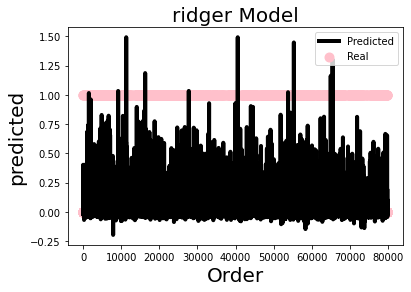

In [6]:
ridger = Ridge( )
ridger.fit(X_train, y_train)
y_predict = ridger.predict(X_test)        # 模型预测（测试集），y_pred为预测结果


print('ridger regression model mean absolute error：',mean_absolute_error(y_test,y_predict))  #越小越好
print('ridger regression model mean squared error ：',mean_squared_error(y_test,y_predict))   #越小越好
print('ridger regression model median absolute error：',median_absolute_error(y_test,y_predict))  #越小越好
print('ridger regression model explained variance score：',explained_variance_score(y_test,y_predict))    #越大越好
print('ridger regression model r2 score：',r2_score(y_test,y_predict)) #越大越好
plt.figure()        #Create a new figure
plt.scatter( range(len(y_test)), y_test, color = "pink", label = "Real", linewidth = 4)   #Plot the real data
plt.plot(range(len(y_test)), y_predict, color = "black", label = "Predicted", linewidth = 4) #Plot the predicted data
plt.title("ridger Model", fontdict=font2)    #Set the model title name
plt.xlabel("Order", fontdict= font2)
plt.ylabel("predicted", fontdict= font2)
plt.legend()
plt.show()


Lasso regression model mean absolute error： 0.017777346206774767
Lasso regression model mean squared error ： 0.009291881988991271
Lasso regression model median absolute error： 0.008558715834519557
Lasso regression model explained variance score： -2.220446049250313e-16
Lasso regression model r2 score： -7.24510514533705e-05


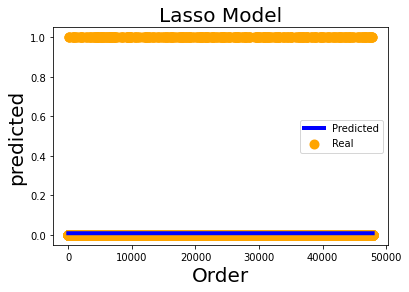

In [8]:
X_train, X_test ,y_train, y_test= train_test_split(features, identity_hate,test_size=0.3, random_state = 20, shuffle=False)
lasso = Lasso(alpha=0.01, normalize=True)       #Revoke the model Lasso
results_lasso = lasso.fit(X_train, y_train)     #Fit the train dataset
y_predict = lasso.predict(X_test)               #Predict the result by utilizing the Lasso model

print('Lasso regression model mean absolute error：',mean_absolute_error(y_test,y_predict))
print('Lasso regression model mean squared error ：',mean_squared_error(y_test,y_predict))
print('Lasso regression model median absolute error：',median_absolute_error(y_test,y_predict))
print('Lasso regression model explained variance score：',explained_variance_score(y_test,y_predict))
print('Lasso regression model r2 score：',r2_score(y_test,y_predict))
plt.figure()        #Create a new figure
plt.scatter( range(len(y_test)), y_test, color = "orange", label = "Real", linewidth = 4)   #Plot the real data
plt.plot(range(len(y_test)), y_predict, color = "blue", label = "Predicted", linewidth = 4) #Plot the predicted data
plt.title("Lasso Model", fontdict=font2)    #Set the model title name
plt.xlabel("Order", fontdict= font2)
plt.ylabel("predicted", fontdict= font2)
plt.legend()
plt.show()


Linear regression model mean absolute error： 0.04538344827934254
Linear regression model mean squared error： 0.008250988788484646
Linear regression model median absolute error： 0.031754963975227285
Linear regression model explained variance score： -0.0396801499142716
Linear regression model r2 score： -0.039691127581231056


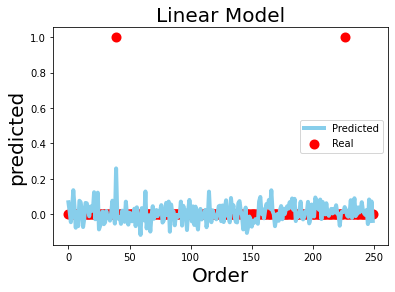

In [2]:
X_train, X_test, y_train, y_test = train_test_split(features[0:500], identity_hate[0:500], test_size=0.5, random_state=0)

LinearRegression_model = LinearRegression()         #Use the model LinearRegression
LinearRegression_model.fit(X_train, y_train)        #Fit the train dataset
y_predict = LinearRegression_model.predict(X_test)  #Predict the result by utilizing the LinearRegression model
print('Linear regression model mean absolute error：',mean_absolute_error(y_test,y_predict))
print('Linear regression model mean squared error：',mean_squared_error(y_test,y_predict))
print('Linear regression model median absolute error：',median_absolute_error(y_test,y_predict))
print('Linear regression model explained variance score：',explained_variance_score(y_test,y_predict))
print('Linear regression model r2 score：',r2_score(y_test,y_predict))

plt.figure()
plt.scatter( range(len(y_test)), y_test, color = "red", label = "Real", linewidth = 4)          #Plot the real data
plt.plot(range(len(y_test)), y_predict, color = "skyblue", label = "Predicted", linewidth = 4)  #Plot the predicted data
plt.title("Linear Model", fontdict=font2)
plt.xlabel("Order", fontdict= font2)
plt.ylabel("predicted", fontdict= font2)
plt.legend()
plt.show()

In [3]:
print(1)

1


In [ ]:
ID_data = data['id']
fea_csv = HashingVectorizer().fit(data['comment_text'])
fea_csv = fea_csv.fit_transform(data['comment_text'])
ID_csv = pd.DataFrame({"id":ID_data, "prediction":D_tree.predict(fea_csv)})
for i in range(len(ID_csv)):
    if ID_csv["prediction"][i]>0.5:
        ID_csv["prediction"][i] = True
    else:
        ID_csv["prediction"][i]  = False
print("ID_csv = ", ID_csv)
ID_csv.to_csv("toxiccomments_submission1.csv")